In [3]:
from pandas import *
Udemy_Courses=read_csv("E:\\Data Analysis\\projects\\EDA\\Udemy_Courses.csv")

In [4]:
#Explore the data and get some information
Udemy_Courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [5]:
# Explore first 5 rows
Udemy_Courses.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [12]:
#checking for Duplicates
Udemy_Courses.duplicated().all()

False

In [10]:
#checking for null values
Udemy_Courses.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [15]:
#transform Udemy_Courses['published_timestamp'] from string to data time
Udemy_Courses['published_timestamp']=to_datetime(Udemy_Courses['published_timestamp'])
print(Udemy_Courses['published_timestamp'])

0      2014-09-18 05:07:05+00:00
1      2017-04-12 19:06:34+00:00
2      2017-04-26 18:34:57+00:00
3      2017-02-21 23:48:18+00:00
4      2017-02-21 23:44:49+00:00
                  ...           
3677   2015-04-20 22:15:17+00:00
3678   2015-10-26 20:04:21+00:00
3679   2015-11-11 18:55:45+00:00
3680   2017-05-26 16:45:55+00:00
3681   2016-09-26 22:19:48+00:00
Name: published_timestamp, Length: 3682, dtype: datetime64[ns, UTC]


In [19]:
#create new column with the year values only to answer related questions
Udemy_Courses['year']=Udemy_Courses['published_timestamp'].dt.year 

In [31]:
#transform price data type from string to in 
#first replace free values with 0
Udemy_Courses.replace({'Free':0},inplace=True)
#second transform to int 
Udemy_Courses['price']=to_numeric(Udemy_Courses['price'])
print(Udemy_Courses['price'])

0        35
1        75
2        75
3        75
4        75
       ... 
3677    120
3678     70
3679     40
3680      0
3681     50
Name: price, Length: 3682, dtype: int64


In [32]:
#check for final result
Udemy_Courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   int64              
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   object             
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
 11  year                 3682 non-null   int64              
dtypes: bool(1), datetime

In [34]:
#Let’s start out Exploratoy Data Analysis Journey 
Udemy_Courses.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,year
count,3.682000e+03,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,66.010320,3194.230310,156.093156,40.065182,2015.432917
std,3.436355e+05,60.984167,9499.378361,934.957204,50.373299,1.185800
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,4.078430e+05,20.000000,110.250000,4.000000,15.000000,2015.000000
50%,6.885580e+05,45.000000,911.500000,18.000000,25.000000,2016.000000
75%,9.617515e+05,95.000000,2540.250000,67.000000,45.000000,2016.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,2017.000000


(array([3.623e+03, 3.400e+01, 1.600e+01, 4.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([     0. ,  26892.3,  53784.6,  80676.9, 107569.2, 134461.5,
        161353.8, 188246.1, 215138.4, 242030.7, 268923. ]),
 <BarContainer object of 10 artists>)

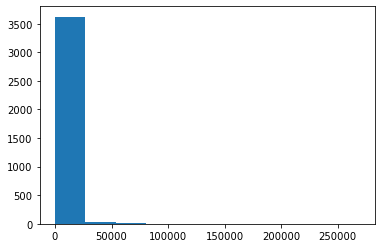

In [41]:
#do some visualization 
import matplotlib.pyplot as plt
plt.hist(Udemy_Courses['num_subscribers'])

(array([3.655e+03, 1.100e+01, 7.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2744.5,  5489. ,  8233.5, 10978. , 13722.5, 16467. ,
        19211.5, 21956. , 24700.5, 27445. ]),
 <BarContainer object of 10 artists>)

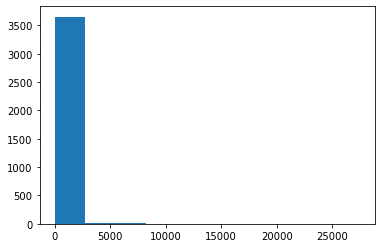

In [42]:
plt.hist(Udemy_Courses['num_reviews'])

(array([3.275e+03, 3.030e+02, 5.500e+01, 2.100e+01, 1.600e+01, 7.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  77.9, 155.8, 233.7, 311.6, 389.5, 467.4, 545.3, 623.2,
        701.1, 779. ]),
 <BarContainer object of 10 artists>)

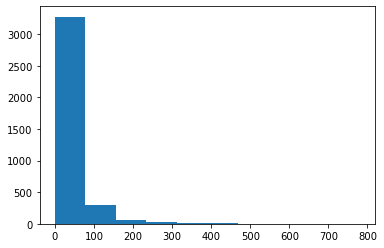

In [43]:
plt.hist(Udemy_Courses['num_lectures'])

In [45]:
#find the correlation between numeric columns 
matrix=Udemy_Courses[['num_subscribers','num_reviews','num_lectures']].corr()
print(matrix)

                 num_subscribers  num_reviews  num_lectures
num_subscribers         1.000000     0.649957      0.157929
num_reviews             0.649957     1.000000      0.243083
num_lectures            0.157929     0.243083      1.000000


In [68]:
#How many courses for each subject is udemy offering?
S_count=Udemy_Courses.groupby(['subject'])['course_id'].count().sort_values(ascending=False)
print(S_count)

subject
Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: course_id, dtype: int64


<AxesSubplot:xlabel='subject'>

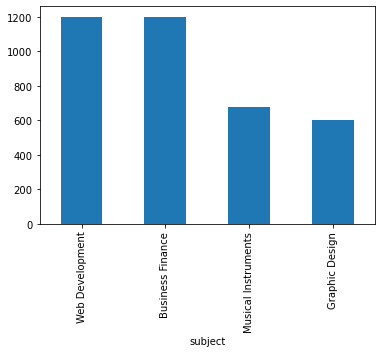

In [69]:
S_count.plot.bar()

In [70]:
# Which subject has the maximum number of Courses
print(S_count.head(1))

subject
Web Development    1200
Name: course_id, dtype: int64


In [77]:
# how many free courses are available for every subject
free_courses=Udemy_Courses[Udemy_Courses['price']==0].groupby('subject')['course_id'].count().sort_values(ascending=False)
print(free_courses)

subject
Web Development        133
Business Finance        96
Musical Instruments     46
Graphic Design          35
Name: course_id, dtype: int64
